### Import libraries 


In [1]:
import pandas as pd
import numpy as np
# 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler ,RobustScaler
import scipy.stats as stats


## INFO

In [2]:
# path in my pc
PATH = r'E:\_Projects\_Final Projects\Black_Friday_Sales\ignoreFiles\train.csv'
df = pd.read_csv(PATH , encoding='utf-8',sep=',')

In [3]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [26]:
df.describe()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,1707.473323,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,1012.201109,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,930.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,1666.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,2550.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
print(df.shape)
for i in df.columns[1:11] :
    print(f"------------------[{i}]------------------")
    print(df[i].value_counts())

(550068, 12)
------------------[Product_ID]------------------
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
------------------[Gender]------------------
M    414259
F    135809
Name: Gender, dtype: int64
------------------[Age]------------------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
------------------[Occupation]------------------
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
------------------[City_Category]------------------
B    231173
C    171175
A    147720
N

In [8]:
columns_to_convert = ['Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']
df[columns_to_convert] = df[columns_to_convert].astype(object)


<AxesSubplot: >

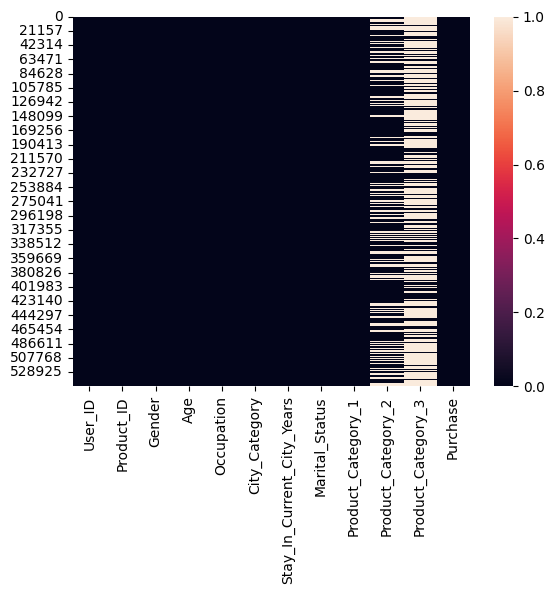

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## EDA

## PreProcessing


#### Missing

In [11]:
df.fillna(0, inplace = True)

<AxesSubplot: >

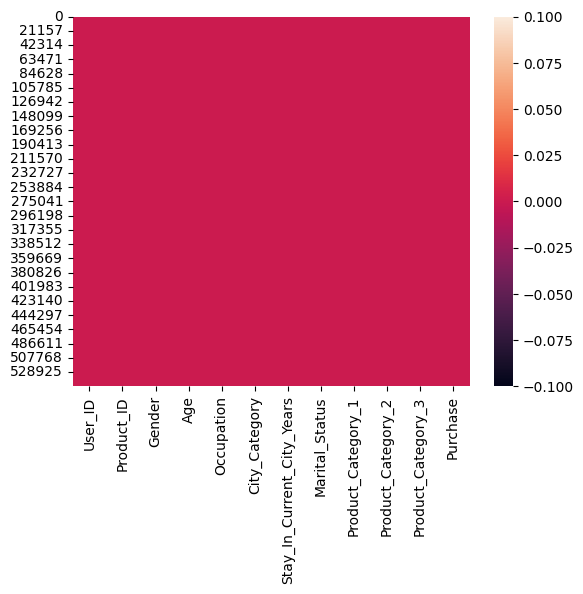

In [12]:
sns.heatmap(df.isnull())

#### Encoding


In [13]:

# encoding
le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])


#### Scaling

##### Stander 

In [14]:
sc = StandardScaler()  
df_Stander= pd.DataFrame(sc.fit_transform(df), columns=df.columns)

#### MinMax

In [15]:
mm = MinMaxScaler()  
df_MinMax = pd.DataFrame(mm.fit_transform(df), columns=df.columns)

#### Robust

In [16]:
rs = RobustScaler()  
df_Robust = pd.DataFrame(rs.fit_transform(df), columns=df.columns)


#### Compar


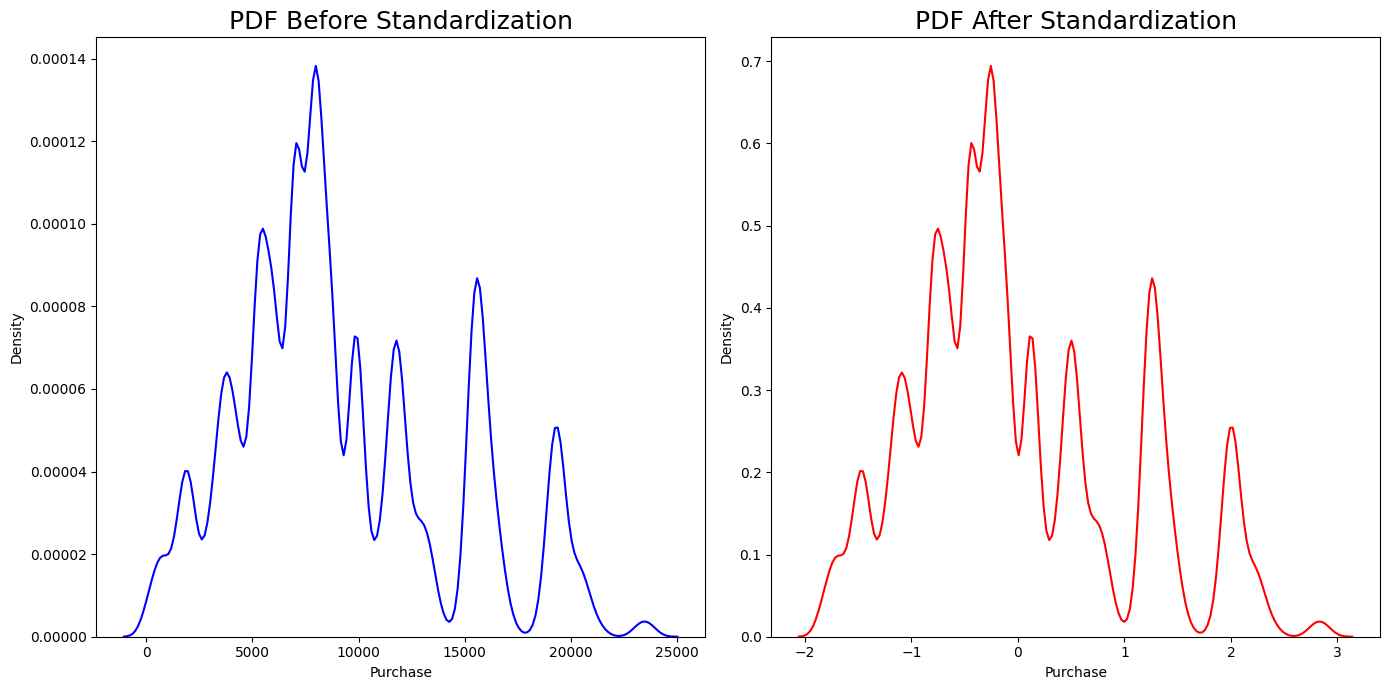

In [24]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(data=df['Purchase'], color="blue")
plt.subplot(1, 2, 2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(data=df_Stander['Purchase'], color="red")
plt.tight_layout()
plt.show()


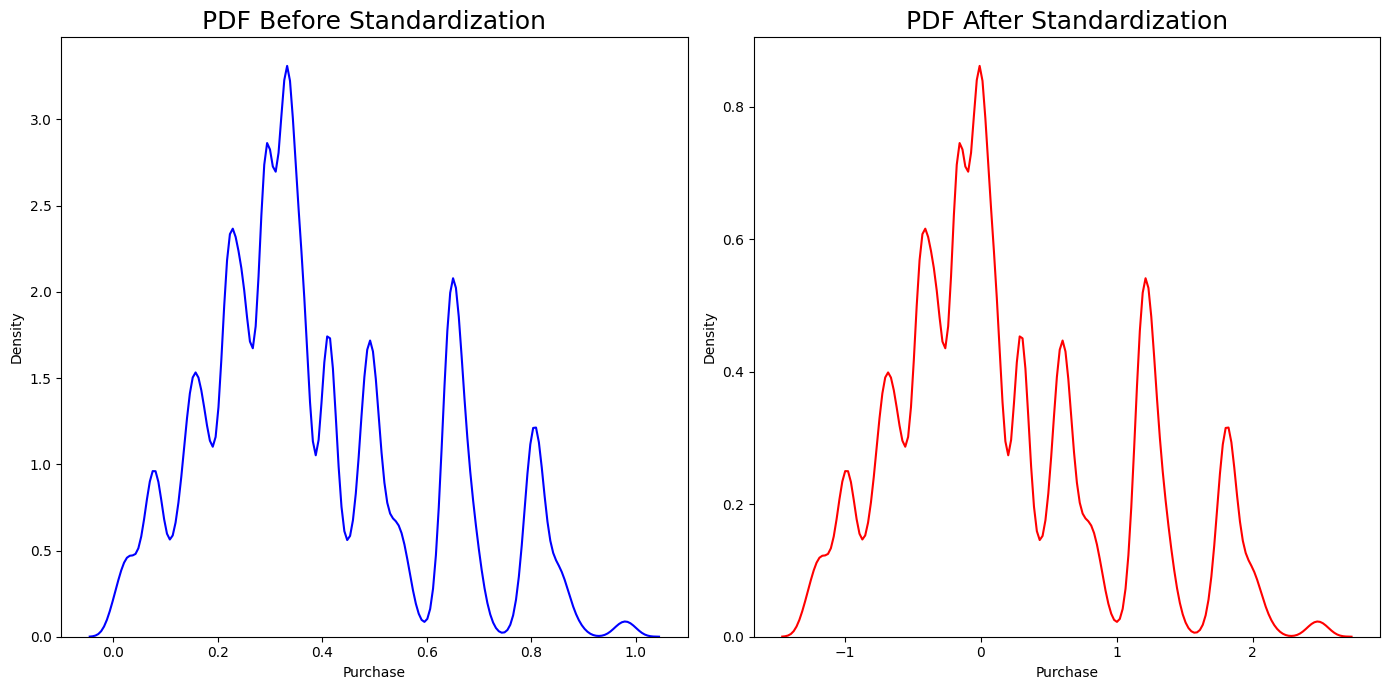

In [25]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("PDF After MinMax", fontsize=18)
sns.kdeplot(data=df_MinMax['Purchase'], color="blue")
plt.subplot(1, 2, 2)
plt.title("PDF After Robust", fontsize=18)
sns.kdeplot(data=df_Robust['Purchase'], color="red")
plt.tight_layout()
plt.show()


In [30]:
X_R = df_Robust.drop(['Purchase','User_ID'],axis=1)
Y_R =df_Robust['Purchase']

xR_train ,xR_test ,yR_train,yR_test =train_test_split(X_R,Y_R,test_size=0.2,random_state=42)


print(X_R.shape, xR_train.shape, xR_test.shape, sep='\n')


(550068, 10)
(440054, 10)
(110014, 10)


## Models 

In [33]:
import pycaret
pycaret.__version__


'3.0.4'

In [34]:
from pycaret.regression import *


In [36]:
exp = RegressionExperiment()

exp.setup(df_Robust, target='Purchase', session_id=123)


,Description,Value
0,Session id,123
1,Target,Purchase
2,Target type,Regression
3,Original data shape,"(550068, 12)"
4,Transformed data shape,"(550068, 12)"
5,Transformed train set shape,"(385047, 12)"
6,Transformed test set shape,"(165021, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = exp.compare_models()


<hr>
<hr>
<hr>